Problem 2 (Python)

1. Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csv (Links to an external site.)
2. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.
3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.
4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?
5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

# LOADING DATA

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv')

In [3]:
#Data shape
data.shape

(961, 4)

In [4]:
#Data glimps
data.head()

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79


In [5]:
#Checking missing values
data.isnull().sum()

food item          0
weight_in_grams    0
saturated_fat      0
cholesterol        0
dtype: int64

In [6]:
#Checking data type for all the features
data.dtypes

food item           object
weight_in_grams    float64
saturated_fat      float64
cholesterol          int64
dtype: object

In [7]:
#Checking count of unique values in each features
for i in data.columns:
  print(f'{i:{20}} {data[i].nunique()}')

food item            961
weight_in_grams      254
saturated_fat        159
cholesterol          144


# SORT THE DATA SET BY SATURATED_ FAT AND PRODUCE A LISTING OF THE FIVE FOOD ITEMS HIGHEST IN SATURATED FAT. COMMENT ON THE VALIDITY OF COMPARING FOOD ITEMS OF DIFFERENT SIZES.

### SORT DATA BY SATURATED FAT

In [8]:
data.sort_values('saturated_fat',ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,food item,weight_in_grams,saturated_fat,cholesterol
0,CHEESECAKE 1 CAKE,1110.0,119.9,2053
1,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
2,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
3,CREME PIE 1 PIE,910.0,90.1,46
4,LARD 1 CUP,205.0,80.4,195


### LIST FIVE ITEMS HAVE HIGH SATURATED FAT

In [9]:
[i for i in data['food item'][0:5]]

['CHEESECAKE                    1 CAKE  ',
 'ICE CREAM; VANLLA; RICH 16% FT1/2 GAL ',
 'YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE  ',
 'CREME PIE                     1 PIE   ',
 'LARD                          1 CUP   ']

### COMMENT ON THE VALIDITY OF COMPARING FOOD ITEMS OF DIFFERENT SIZES

1. Cheesecake, Icecream-vanilla-rich, Yellowcake-chocofrosting have saturated_fat 119.9, 118.3 & 92.0 respectively but wieght of that food items are more than 1 kg which is a big size food items
2. Creme pie have a saturated_fat 90.1 and the weight of that food item is 910 gram which is also a more than medium size food item
3. Lard 1 cup have a saturated fat 80.4 but the size of the 1 cup lard is 200 gram which is a small size of food item
4. We can conclude that 1 cup lard have weight of 200 gram but it contains high amount of saturated_fat due to it is a semi-solid white fat product

# CREATE A NEW VARIABLE, SATURATED_ FAT_ PER_GRAM, BY DIVIDING THE AMOUNT OF SATURATED FAT  BY THE WEIGHT IN GRAMS. SORT THE DATA SET BY SATURATED_ FAT_ PER_GRAM AND PRODUCE A LISTING OF THE FIVE FOOD  ITEMS HIGHEST IN SATURATED FAT PER GRAM. WHICH FOOD HAS THE MOST SATURATED FAT PER GRAM?

### CREATING NEW VARIABLE: SATURATED FAT PER GRAM

In [10]:
data['saturated_ fat_ per_gram'] = data['saturated_fat']/data['weight_in_grams']
data.head()

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_ fat_ per_gram
0,CHEESECAKE 1 CAKE,1110.0,119.9,2053,0.108018
1,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703,0.099579
2,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609,0.083032
3,CREME PIE 1 PIE,910.0,90.1,46,0.099011
4,LARD 1 CUP,205.0,80.4,195,0.392195


### SORT DATA BY SATURATED FAT PER GRAM

In [11]:
data.sort_values('saturated_ fat_ per_gram',ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_ fat_ per_gram
0,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
1,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
2,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
3,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
4,BUTTER; SALTED 1 PAT,5.0,2.5,11,0.500000


### LIST FIVE ITEMS HAVE HIGH SATURATED FAT PER GRAM

In [12]:
[i for i in data['food item'][0:5]]

['BUTTER; SALTED                1 TBSP  ',
 'BUTTER; UNSALTED              1 TBSP  ',
 'BUTTER; SALTED                1/2 CUP ',
 'BUTTER; UNSALTED              1/2 CUP ',
 'BUTTER; SALTED                1 PAT   ']

### WHICH FOOD HAS THE MOST SATURATED FAT PER GRAM ?

Butter Salted 1 TBSP and Butter Unsalted 1 TBSP has the most saturated fat per gram

# STANDARDIZE (ZERO MEAN) THE FIELD SATURATED_ FAT_ PER_GRAM, AND PRODUCE A LISTING OF ALL THE FOOD ITEMS THAT ARE OUTLIERS AT THE HIGH END OF THE SCALE. HOW MANY FOOD ITEMS ARE OUTLIERS AT THE LOW END OF THE SCALE? CREATE A DENSITY PLOT FOR SATURATED_ FAT_ PER_GRAM.

### DETECTING OUTLIERS USING Z-SCORE ON SATURATED FAT PER GRAM

In [13]:
def detecting_outliers_using_zscore(data, variable):
    df = data[['food item','weight_in_grams',variable]]
    df['zscore'] = abs(zscore(df[variable]))
    df['is_outliers'] = ['outlier' if i>3 else 'not outlier' for i in df['zscore']]
    outliers = df[df['is_outliers']=='outlier']
    return outliers

In [14]:
outliers = detecting_outliers_using_zscore(data, 'saturated_ fat_ per_gram')
outliers

,food item,weight_in_grams,saturated_ fat_ per_gram,zscore,is_outliers
0,BUTTER; SALTED 1 TBSP,14.00,0.507143,7.110475,outlier
1,BUTTER; UNSALTED 1 TBSP,14.00,0.507143,7.110475,outlier
2,BUTTER; SALTED 1/2 CUP,113.00,0.505310,7.082741,outlier
3,BUTTER; UNSALTED 1/2 CUP,113.00,0.505310,7.082741,outlier
4,BUTTER; SALTED 1 PAT,5.00,0.500000,7.002408,outlier
5,BUTTER; UNSALTED 1 PAT,5.00,0.500000,7.002408,outlier
6,LARD 1 TBSP,13.00,0.392308,5.373078,outlier
7,LARD 1 CUP,205.00,0.392195,5.371375,outlier
8,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.350000,4.732985,outlier
9,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,0.317460,4.240676,outlier


### SUMMARY POINTS ON DETECTING OUTLIERS USING Z-SCORE ON SATURATED FAT PER GRAM

We have detected 15 records as an outliers in saturated_ fat_ per_gram features

### DETECTING OUTLIERS USING IQR RANGE METHOD ON SATURATED FAT PER GRAM

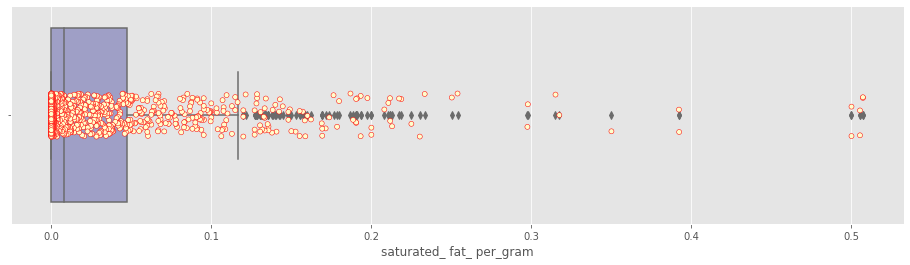

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(16,4))
sns.boxplot(x=data['saturated_ fat_ per_gram'], color='#9999cc');
sns.stripplot(x=data['saturated_ fat_ per_gram'], color='#ffffcc',edgecolor='red',linewidth=0.5);

In [16]:
def detect_outliers_boxplot(data,variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    Outliers_lower_bound = data[variable][data[variable]<Q1-(1.5*IQR)]
    Outliers_upper_bound = data[variable][data[variable]>Q3+(1.5*IQR)]
    return Outliers_lower_bound, Outliers_upper_bound

In [17]:
Outliers_lower, Outliers_upper = detect_outliers_boxplot(data, 'saturated_ fat_ per_gram')

In [18]:
print(f'Number of outliers in lower bound: {len(Outliers_lower)}')
print(f'Number of outliers in upper bound: {len(Outliers_upper)}')
print(f'Number of extreme outliers in upper bound:{len(Outliers_upper[Outliers_upper>0.4])}')
print(f'Minimum saturated_ fat_ per_gram detected as an outliers: {np.min(Outliers_upper)}')
print(f'Maximum saturated_ fat_ per_gram detected as an outliers: {np.max(Outliers_upper)}')

Number of outliers in lower bound: 0
Number of outliers in upper bound: 85
Number of extreme outliers in upper bound:6
Minimum saturated_ fat_ per_gram detected as an outliers: 0.12
Maximum saturated_ fat_ per_gram detected as an outliers: 0.5071428571428571


### SUMMARY POINTS ON DETECTING OUTLIERS USING IQR RANGE METHOD ON SATURATED FAT PER GRAM

1. We didn't any outliers from the lower bound
2. We have detected 85 records as an outliers from the upper bound in saturated_ fat_ per_gram features
3. 6 records has been identified as an extreme outliers as it has saturated_ fat_ per_gram more than 0.4

### CREATE DENSITY PLOT ON SATURATED FAT PER GRAM

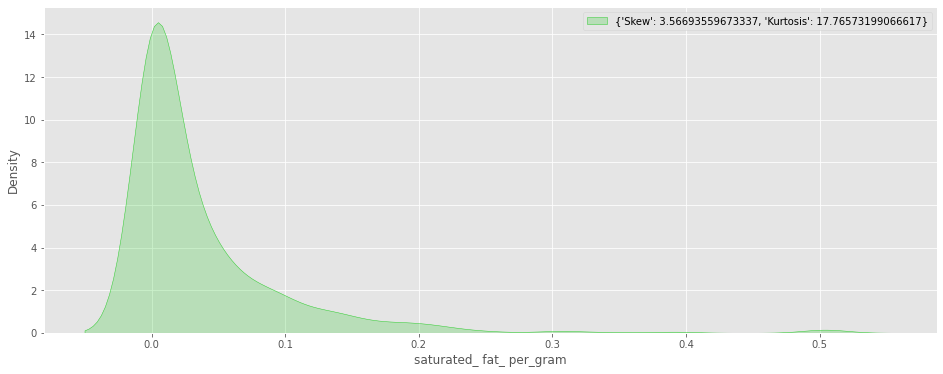

In [19]:
plt.figure(figsize=(16,6))
sns.distplot(data['saturated_ fat_ per_gram'],hist=False, kde=True,kde_kws={'color':'limegreen','shade':True}, label={'Skew':data['saturated_ fat_ per_gram'].skew(),'Kurtosis':data['saturated_ fat_ per_gram'].kurt()});
plt.legend();

### SUMMARY POINTS ON DENSITY PLOT ON SATURATED FAT PER GRAM

1. The distribution plot is right skewed and high kurtosis
2. saturated_ fat_ per_gram from 0.2 to 0.5 indicator of the outliers

### CREATE DENSITY PLOT ON SATURATED FAT PER GRAM AFTER REMOVING AN OUTLIERS

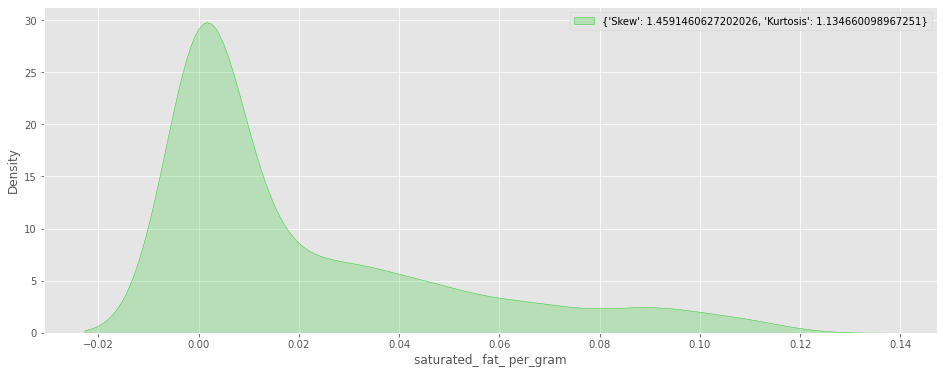

In [20]:
plt.figure(figsize=(16,6))
sns.distplot(data['saturated_ fat_ per_gram'][data['saturated_ fat_ per_gram']<0.12],
             hist=False, 
             kde=True,
             kde_kws={'color':'limegreen','shade':True}, 
             label={'Skew':data['saturated_ fat_ per_gram'][data['saturated_ fat_ per_gram']<0.12].skew(),
                    'Kurtosis':data['saturated_ fat_ per_gram'][data['saturated_ fat_ per_gram']<0.12].kurt()});
plt.legend();